In [13]:

url = 'https://api.hkma.gov.hk/public/coin-cart-schedule?lang=en&offset=0'
response = requests.get(url)
result = response.json()

df = pd.DataFrame()
for record in range(len(result['result']['records'])):
    line = pd.DataFrame(result['result']['records'][record], index = [record])
    df = pd.concat([df,line])

df = df.astype('str')



df['label'] = df['district'] +', \n' + df['start_date'].apply(lambda x: x[5:]) +' to ' +df['end_date'].apply(lambda x: x[5:])


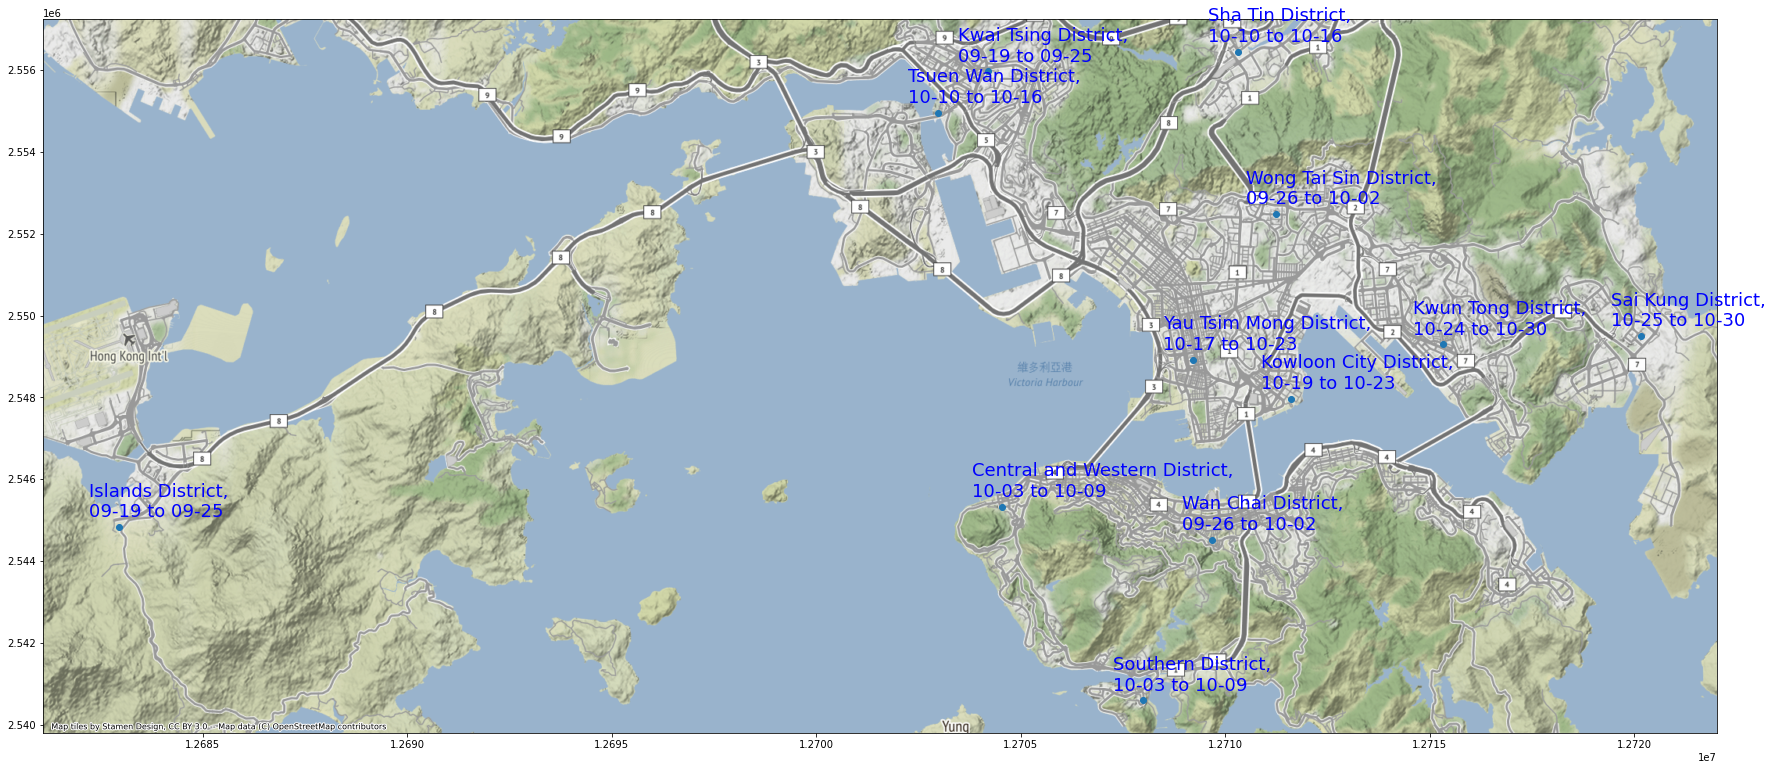

In [12]:
import contextily as cx
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs = "EPSG:4326")
)

gdf.to_crs(epsg = 3857, inplace = True)
gdf.head()

ax = gdf.plot(figsize=(30, 20), alpha = 1)
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.label):
    ax.annotate(text = label, xy=(x, y), xytext=(-30, 10), textcoords="offset points", color = 'blue', size = 18)
cx.add_basemap(ax)